# Importing Data

In [1]:
import numpy as np 
import pandas as pd
import os

# Importing Data 
train = pd.read_csv("/kaggle/input/titanic/train.csv", delimiter=',', header=0)
test = pd.read_csv("/kaggle/input/titanic/test.csv", delimiter=',', header=0)

# Data Analysis

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("Train Dataset Shape : {}".format(train.shape))
print("Test Dataset Shape : {}".format(test.shape))

Train Dataset Shape : (891, 12)
Test Dataset Shape : (418, 11)


In [5]:
train_df = train
test_df = test

### Age Distribution 

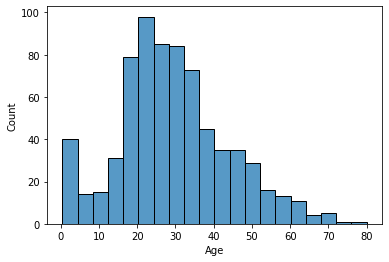

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('Age')
sns.histplot(data=train_df , x='Age');

### Total Survived based on Embarked
C = Cherbourg
Q = Queenstown
S = Southampton

<AxesSubplot:xlabel='Embarked', ylabel='count'>

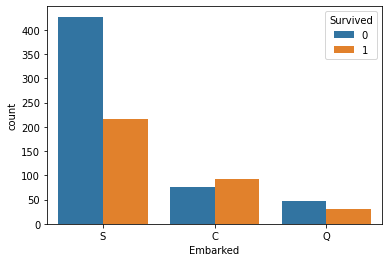

In [7]:
sns.countplot(data = train_df, x = 'Embarked', hue='Survived')

### Total Survival by Gender

<AxesSubplot:xlabel='Sex', ylabel='count'>

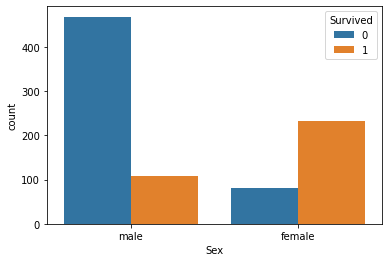

In [8]:
sns.countplot(data = train_df, x = 'Sex', hue='Survived')

### Total Survival Based on Age

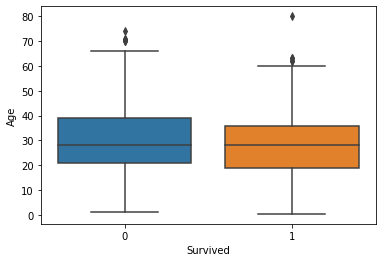

In [9]:
sns.boxplot(data = train_df , y = 'Age', x = 'Survived');

### Correlation Between Data

In [10]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


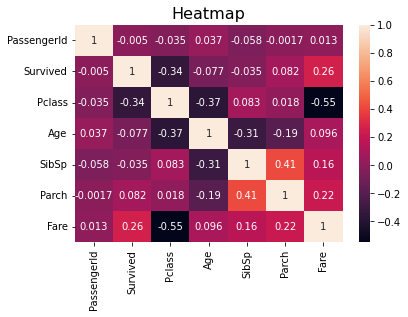

In [11]:
sns.heatmap(train_df.corr(), annot=True);
plt.title("Heatmap", fontsize=16);

# Data Cleansing

### Drop Features

In [12]:
from tables import index

#Function to Drop row and columns
def removeNaN(raw_data):

  df = raw_data
  
  print("Data Frame Size Before Removing NaN : {}".format(df.shape))

  #Check for Null value
  nullCheck = df.isnull().sum() / len(df)
  cols = nullCheck[nullCheck > 0].index

  for col in cols:
    if df.dtypes[col] in ['int64','float64']:
      df[col].fillna(df[col].median(), inplace=True)
    else:
        nullList = [index for index, row in df.iterrows() if row.isnull().any()]
        df.drop(nullList, inplace = True)
        #df[col].fillna("NA", inplace=True)
    
  print("Data Frame Size after removing NaN : {}".format(df.shape))
  return df

def dropFeatureWithTrashold(raw_data, type,drop_column):
    
    df = raw_data
    print("Data Frame Size Before Removing Feature with More Then 50% NaN Value : {}".format(df.shape))
    
    #Features with more then 50% of NaN value
    nullCheck_list = [] 
    if type =='train':
        nullCheck = df.isnull().sum() / len(df) 
        
        cols = nullCheck[nullCheck > 0.5].index
        for col in cols:
            nullCheck_list.append(col)
            print("Features with More then 50% for NaN value : {}".format(col))
    else:
        nullCheck_list = drop_column
  
    #Dropping columns with more then 50% NaN value
    df.drop(nullCheck_list, axis= 1, inplace = True)
    
    print("Data Frame Size After Removing Feature with More Then 50% NaN Value : {}".format(df.shape))
    
    if type == 'train':
        return df, nullCheck_list
    else:
        return df

def reomveIrrelevantFeatures(raw_data):
    
    df = raw_data
    
    print("Data Frame Size Before Removing Irrelevant Features : {}".format(df.shape))
    
    # Removed irrelevant columns
    dropList = ['PassengerId','Name','Ticket']
    df.drop(dropList, axis=1, inplace=True)
    
    print("Data Frame Size After Removing Irrelevant Features : {}".format(df.shape))
    
    return df

def removeDuplicateRow(raw_data):
    df = raw_data
    
    # Finding Any duplicate row in dataset
    print("Data Frame Size Before Removing Duplicate Rows : {}".format(df.shape)) 
    dup_row = df[df.duplicated()]
    if len(dup_row) > 0:
        print("Total Duplicate Row : {}".format(len(dup_row)))
        df = df.drop_duplicates()  
        print("Data Frame Size After Removing Duplicate Rows : {}".format(df.shape))
    else:
        print("No Duplicate Row in Dataset")
    
    return df

In [13]:
df_train = train_df.copy()

df_train_dfwt , null_list = dropFeatureWithTrashold(df_train,type='train', drop_column=None)

df_train_irr = reomveIrrelevantFeatures(df_train_dfwt)

df_train_clns = removeNaN(df_train_irr)

df_train = removeDuplicateRow(df_train_clns)


Data Frame Size Before Removing Feature with More Then 50% NaN Value : (891, 12)
Features with More then 50% for NaN value : Cabin
Data Frame Size After Removing Feature with More Then 50% NaN Value : (891, 11)
Data Frame Size Before Removing Irrelevant Features : (891, 11)
Data Frame Size After Removing Irrelevant Features : (891, 8)
Data Frame Size Before Removing NaN : (891, 8)
Data Frame Size after removing NaN : (889, 8)
Data Frame Size Before Removing Duplicate Rows : (889, 8)
Total Duplicate Row : 116
Data Frame Size After Removing Duplicate Rows : (773, 8)


In [14]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
df_test = test_df.copy()

df_test_dfwt = dropFeatureWithTrashold(df_test,type='test', drop_column=null_list)

df_test_rif = reomveIrrelevantFeatures(df_test_dfwt)

df_test_clns = removeNaN(df_test_rif)

#df_test = removeDuplicateRow(df_test_clns)

Data Frame Size Before Removing Feature with More Then 50% NaN Value : (418, 11)
Data Frame Size After Removing Feature with More Then 50% NaN Value : (418, 10)
Data Frame Size Before Removing Irrelevant Features : (418, 10)
Data Frame Size After Removing Irrelevant Features : (418, 7)
Data Frame Size Before Removing NaN : (418, 7)
Data Frame Size after removing NaN : (418, 7)


In [16]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Standardization and Dummy Varaibles

In [17]:
from sklearn import preprocessing

# Function to Normalized data
def normalizing_data(raw_data):
  
  df = raw_data

  dummy_dataype = ['object']
  zz_dataype = ['int64','float64']
    
  dummy_feature_list = []
  zz_feature_list = []
  
  dependent_var = ['Survived']
  stnd_list = ['dummy','zz']

  features = df.columns
  
  for each in stnd_list:
    if each == 'dummy':
      for feature in features:
        if (df.dtypes[feature] in dummy_dataype):
          dummy_feature_list.append(feature)
          print("Dummy Varaibles : {} ".format(feature))

          dummy = pd.get_dummies(df[feature], drop_first=True)
          df = pd.concat([df, dummy], axis=1)
    else:
      for feature in features:
        if (df.dtypes[feature] in zz_dataype) and ( feature not in dependent_var):
          zz_feature_list.append(feature)
          print("ZZ varaibles for Scaling  : {} ".format(feature))
          
          df[feature] = preprocessing.scale(df[feature])

  #Dropping Dummy Varaibles
  df.drop(dummy_feature_list, axis=1, inplace=True)

  return df

In [18]:
df_train = normalizing_data(df_train)

Dummy Varaibles : Sex 
Dummy Varaibles : Embarked 
ZZ varaibles for Scaling  : Pclass 
ZZ varaibles for Scaling  : Age 
ZZ varaibles for Scaling  : SibSp 
ZZ varaibles for Scaling  : Parch 
ZZ varaibles for Scaling  : Fare 


### Sanity Check

In [19]:
df_train.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [20]:
df_test.isnull().sum().sort_values(ascending=False)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,0.880906,-0.548619,0.474055,-0.501565,-0.525112,1,0,1
1,1,-1.467164,0.617360,0.474055,-0.501565,0.697085,0,0,0
2,1,0.880906,-0.257124,-0.535434,-0.501565,-0.512228,0,0,1
3,1,-1.467164,0.398739,0.474055,-0.501565,0.350022,0,0,1
4,0,0.880906,0.398739,-0.535434,-0.501565,-0.509842,1,0,1


In [22]:
print("Train Dataset Shape : {}".format(df_train.shape))

Train Dataset Shape : (773, 9)


# Building the Model

### Preparing the Data

In [23]:
y = df_train['Survived']
X = df_train.drop(['Survived'], axis = 1)

print("X Shape : {}".format(X.shape))
print("y Shape : {}".format(y.shape))

X Shape : (773, 8)
y Shape : (773,)


### Decission Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

#Spliting Data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 123)

dt = DecisionTreeClassifier(criterion='entropy' ,random_state=1234, max_depth=5)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

score = accuracy_score(y_pred, y_test)

print("Model Accurcy : {}".format(score))
print("F1 Score      : {}".format(f1_score(y_pred, y_test)))

Model Accurcy : 0.8451612903225807
F1 Score      : 0.7894736842105264


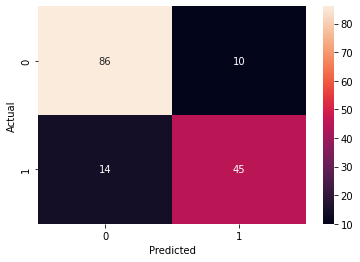

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        96
           1       0.82      0.76      0.79        59

    accuracy                           0.85       155
   macro avg       0.84      0.83      0.83       155
weighted avg       0.84      0.85      0.84       155



In [25]:
from sklearn.metrics import classification_report
import seaborn as sn

# Confusion Metrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

stats = classification_report(y_test, y_pred)
print(stats)

In [26]:
# Checking for Overfit or Underfit of the model
print("Training Accuracy : {}".format(dt.score(X_train, y_train)))
print("Testing Accuracy : {}".format(dt.score(X_test, y_test)))

Training Accuracy : 0.8187702265372169
Testing Accuracy : 0.8451612903225807


# Predicting Test Data

In [27]:
test = df_test.copy()
df_test_norm = normalizing_data(test)

Dummy Varaibles : Sex 
Dummy Varaibles : Embarked 
ZZ varaibles for Scaling  : Pclass 
ZZ varaibles for Scaling  : Age 
ZZ varaibles for Scaling  : SibSp 
ZZ varaibles for Scaling  : Parch 
ZZ varaibles for Scaling  : Fare 


In [28]:
print("Raw Test Data : {}".format(test.shape))
print("Normalized Test Data : {}".format(df_test_norm.shape))

Raw Test Data : (418, 7)
Normalized Test Data : (418, 8)


In [29]:
df_test_norm.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,1,1,0
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,0,0,1
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,1,1,0
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,1,0,1
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,0,0,1


In [30]:
y_pred = dt.predict(df_test_norm)

In [31]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
# Adding Survived class with Test data to find the Actual Customer
dependent_var = pd.DataFrame(y_pred, columns =['Survived'])
customer_df = pd.concat([test_df, dependent_var], axis = 1)

In [33]:
customer_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [34]:
submission = customer_df.loc[:,['PassengerId','Survived']]

submission.to_csv('submission.csv',index=False)

pd.read_csv('submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
